In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob
import numpy as np

gpus = tf.config.experimental.list_physical_devices("GPU")
if len(gpus) > 0:
    [tf.config.experimental.set_memory_growth(gpu, True) for gpu in gpus]

2022-12-04 19:05:26.040489: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-04 19:05:26.131314: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-04 19:05:27.714184: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-04 19:05:27.714495: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node

In [7]:
file_list = glob("*.jpg")

imgs = np.empty((0, 256, 256), dtype=np.uint8)

for file_path in file_list:
    img = np.array(Image.open(file_path).convert('L'))
    imgs = np.append(imgs, img[np.newaxis, :, :], axis = 0)

In [8]:
imgs.shape
imgs_tensor = tf.convert_to_tensor(imgs)

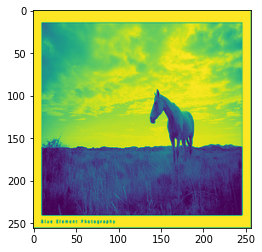

In [4]:
plt.imshow(imgs_tensor.numpy()[0,:,:,np.newaxis])

In [28]:
print(imgs_tensor.shape)
imgs_tensor_tp = tf.transpose(imgs_tensor, perm=[1, 2, 0])
imgs_tensor_rc = tf.reshape(imgs_tensor_tp, ( 256*2, 256*2))
print(imgs_tensor_rc.shape)

(4, 256, 256)
(512, 512)


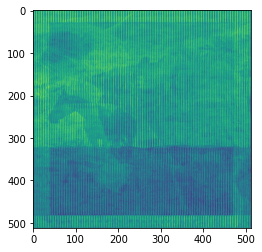

In [29]:
plt.imshow(imgs_tensor_rc.numpy()[:,:,np.newaxis])

In [2]:
import setup_args
import pprint
from datasets_loader import DatasetLoader
args = setup_args.Args()
np.set_printoptions(threshold=np.inf)
rand_generator = tf.random.Generator.from_non_deterministic_state()
    
rand = rand_generator.uniform([], minval=0, maxval=args.mask_size, dtype=tf.int32)

data = DatasetLoader(args, rand_generator)
# data.make_datasets()
train_data = data.load_dataset(1, "train")

print(train_data)
for i, datas in enumerate(train_data):
    print(i)
    mel_x, mask_x, mel_y, mask_y = datas
    print(mel_x.shape)
    print(mask_x.shape)
    print(mel_y.shape)
    print(mask_y.shape)
    if i==3:
        break

2022-12-04 19:05:29.490853: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-04 19:05:29.703578: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-04 19:05:29.704031: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:05:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-04 19:05:29.704313: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have be

<PrefetchDataset element_spec=(TensorSpec(shape=(1, 80, 64, 1), dtype=tf.float32, name=None), TensorSpec(shape=(1, None, None, None), dtype=tf.float32, name=None), TensorSpec(shape=(1, 80, 64, 1), dtype=tf.float32, name=None), TensorSpec(shape=(1, None, None, None), dtype=tf.float32, name=None))>
0
(1, 80, 64, 1)
(1, 80, 64, 1)
(1, 80, 64, 1)
(1, 80, 64, 1)
1
(1, 80, 64, 1)
(1, 80, 64, 1)
(1, 80, 64, 1)
(1, 80, 64, 1)
2
(1, 80, 64, 1)
(1, 80, 64, 1)
(1, 80, 64, 1)
(1, 80, 64, 1)
3
(1, 80, 64, 1)
(1, 80, 64, 1)
(1, 80, 64, 1)
(1, 80, 64, 1)


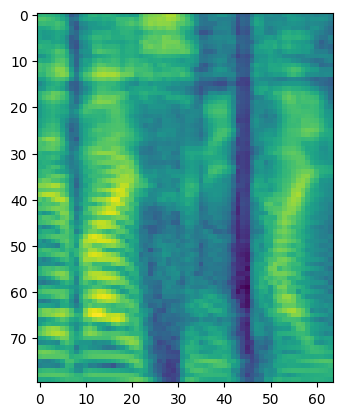

In [3]:
plt.imshow(np.squeeze(mel_x.numpy())[::-1,:,np.newaxis])

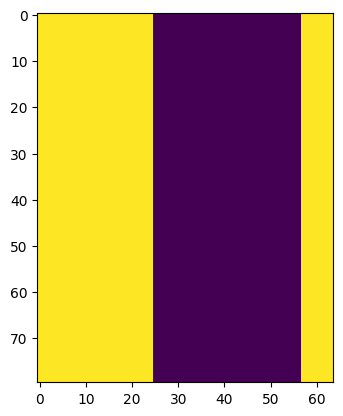

In [4]:
plt.imshow(np.squeeze(mask_x.numpy())[::-1,:,np.newaxis])

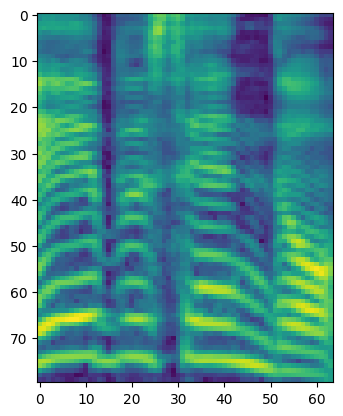

In [5]:
plt.imshow(np.squeeze(mel_y.numpy())[::-1,:,np.newaxis])

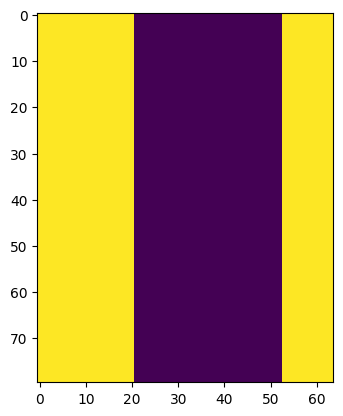

In [6]:
plt.imshow(np.squeeze(mask_y.numpy())[::-1,:,np.newaxis])